In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
print(y)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

print(type(X_train))
# del X_train,X_test

[0 1 1 ... 1 0 1]
<class 'numpy.ndarray'>


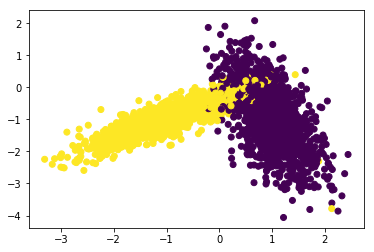

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [35]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score
#def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train):
    #return random.sample(range(0, len(x_train)), int(0.6*len(x_train)))

def RandomizedSearch(x_train,y_train,classifier, params, folds):
    f = len(x_train)
    group1 = int(f/folds) # 2500
    group2 = 2*group1 # 5000
    group3 = 3*group1 # 7500
    lst = []
    lst.extend([group1,group2,group3])
    l = []
    indices_list = []
    l.extend([i for i in range(0,lst[1])]) # list containing indices range from 0 to 5000 i.e (0,1,2,.....,4999)
    indices_list.append(l)
    l = []
    l.extend([i for i in range(lst[0],lst[2])]) # list containing indices range from 2500 to 7500 i.e (2500,2501,.....,7549)
    indices_list.append(l)
    l = []
    l.extend([i for i in range(0,lst[0])] + [i for i in range(lst[1],lst[2])]) # list containing indices range form 0 to 2500 and from 5000 to 7500 i.e(0,1,2...,2549,5000,5001,....,7549)
    indices_list.append(l)
    # indices_list is a list of lists containing three lists.1st list containing indices from 0 to 5000,2nd list contains from 
    # 2500 to 7500 and 3rd contains from 0 to 2500 + 5000 to 7500
    trainscores = []
    testscores  = []  
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        c = 0
        for j in range(0, folds):
            train_indices = indices_list[j]
            test_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices))

            # selecting the data points based on the train_indices and test_indices
     
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  2.87it/s]


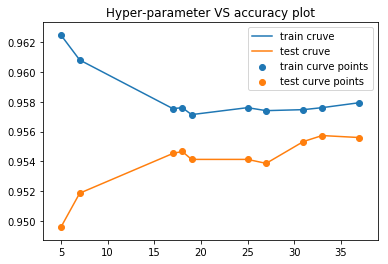

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
l = random.sample(range(1, 50), 10)
l.sort()
params = {'n_neighbors':l}
folds = 3

trainscores,testscores = RandomizedSearch(X_train, y_train, neigh, params, folds)


plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')

plt.scatter(params['n_neighbors'],trainscores, label='train curve points')
plt.scatter(params['n_neighbors'],testscores, label='test curve points')

plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

#### best_k = 33

In [40]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

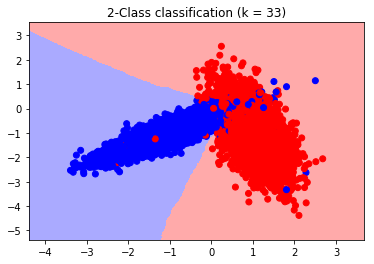

In [41]:
best_k = 33
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = best_k)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)